In [32]:
print(sns.__version__)

0.11.2


# Analisando as notas em geral

In [33]:
import pandas as pd

notas = pd.read_csv("../data/ratings.csv")

Para ler os 5 primeiros dados: 

In [34]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Para saber o formato da tabela:
vai retornar o total de linhas e o número de colunas que a tabela tem

In [35]:
notas.shape

(100836, 4)

Para redefinir o nome das colunas

In [36]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Devolver todos os valores da coluna 'nota'

In [37]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Uma coluna de um dataframe por padrão é uma 'Series'.
Devolver os valores únicos (exclusivos) do objeto 'Series'

In [38]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Verificar a frequência de cada nota

In [39]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

Verificar a média de todas as notas 

In [40]:
notas['nota'].mean()

3.501556983616962

Visualizando os dados

In [41]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [42]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

Plotando uma série de dados do dataframe em um histograma

<AxesSubplot:ylabel='Frequency'>

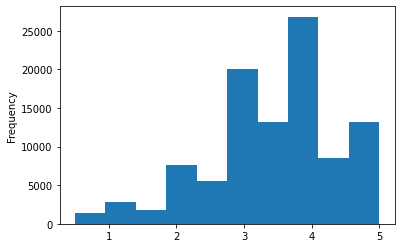

In [43]:
notas.nota.plot(kind='hist')

A visualização de gráficos é muito importante para entendermos o que está acontecendo com os dados. 

Procurando a mediana (quem divide os dados em duas partes, a mediana é a parte central do gráfico).

In [44]:
print(f"Mediana: {notas.nota.median()}")

Mediana: 3.5


Medidas de descrição dos dados

In [45]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Visualização de dados estáticos, com interface gráfica de alto nível

In [46]:
import seaborn as sns

Boxplot é uma forma de visualizar os dados, de acordo com a distruibuição dos dados.

D:\projetos\alura\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

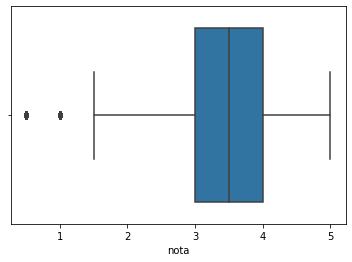

In [47]:
sns.boxplot(notas.nota)

A análise exploratória de dados é uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais, frequentemente com métodos visuais

# Olhando os filmes

In [48]:
filmes = pd.read_csv("../data/movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Encontrar as notas de um filme específico

Retorna as linhas, cuja a coluna filmeId é igual a 1

In [50]:
notas.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


# Analisando algumas notas especificas por filme

Encontrar a media da nota do filmeId == 1 

In [51]:
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

Notas do filme com id==2

In [52]:
notas.query("filmeId == 2").nota.mean()

3.4318181818181817

Agrupar as notas por filmeId e a media 

In [53]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


Extraindo do dataframe a coluna média da nota dos filmes, o programa devolve uma 'Series'

In [54]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

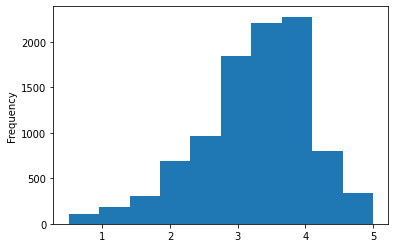

In [55]:
medias_por_filme.plot(kind='hist')

D:\projetos\alura\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

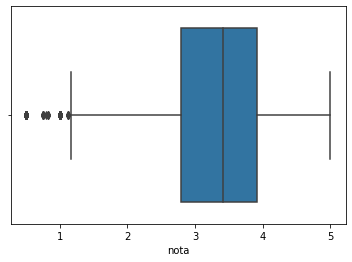

In [56]:
sns.boxplot(medias_por_filme)

Plotando boxplot na vertical

<AxesSubplot:ylabel='nota'>

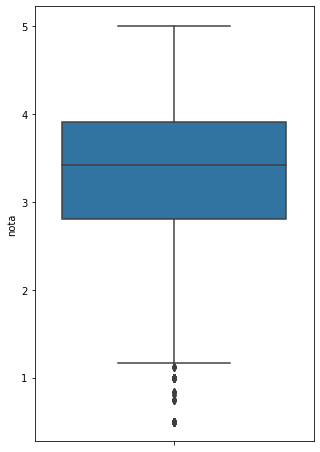

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [58]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

## Fazendo histograma com seaborn 

D:\projetos\alura\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

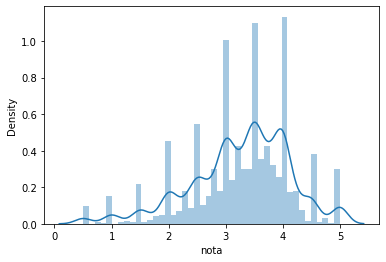

In [59]:
sns.distplot(medias_por_filme)

Podemos escolher a quantidade de "caixinhas" que queremos que apareçam no gráfico.

D:\projetos\alura\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

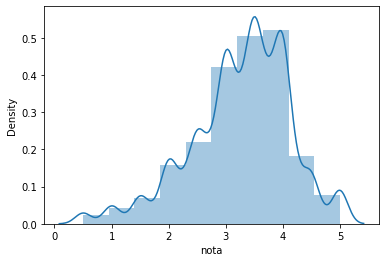

In [60]:
sns.distplot(medias_por_filme, bins=10)

Tanto a biblioteca 'seaborn' quanto a 'pandas' utilizam a biblioteca 'matplotlib' para desenhar gráficos.

Text(0.5, 1.0, 'Histograma das médias dos filmes')

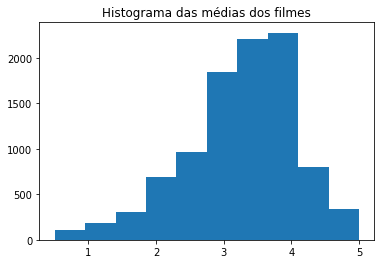

In [61]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

# Analisando dados do TMDB (Base de dados de filmes)

In [62]:
tmdb = pd.read_csv("../data/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Tipos de variáveis

## Variaveis categoricas

São aquelas que nao possuem valores quantitativos, mas, ao contrário,
são definidas por várias categorias, ou seja, representam uma classificação dos
indivíduos. Podem ser nominais ou ordinais.
Quando estamos trabalhando com categorias ordinais, existe uma ordenação entre
as categorias. Por exemplo: escolaridade (primeiro, segundo e terceiro graus),
estágios de uma doença (inicial, intermediário, terminal),
mês de observação (janeiro, fevereiro, ..., dezembro), etc.

Variável Categórica Nominal
- Não existe hierarquia entre as variáveis

In [63]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Variável Categórica Ordinal
 - primeiro grau
 - segundo grau
 - terceiro grau
 - 1º grau < 2º grau < 3º grau

Variável quantitativa
- budget => orcamento => quantidade continuo

Variável quantitativa (categorica intervalar)
- quantidade de votos => 1, 2, 3, 4, não tem 2.5 votos

Numero de aparições de cada categoria

In [64]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [65]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

Série com índice

In [66]:
tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

Tranformando uma série de dados em um dataframe

In [67]:
tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


Tranformar o indice em coluna

In [68]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


Comparando a categoria "original_language". plotando cada uma das categorias da lingua original

<AxesSubplot:xlabel='original_language', ylabel='total'>

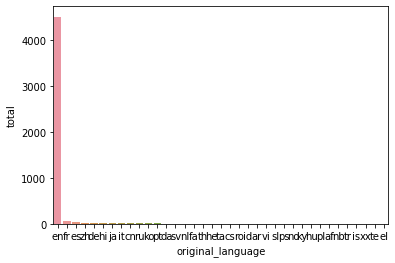

In [69]:
sns.barplot(x="original_language", y="total", data=contagem_de_lingua)

O catplot imprime por categoria contando cada uma das aparições. 

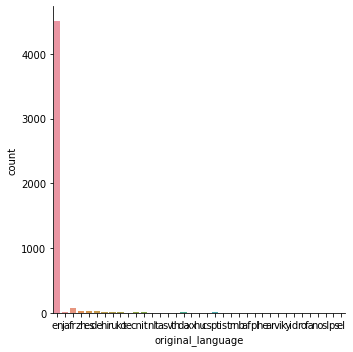

In [70]:
sns.catplot(x="original_language", kind="count", data = tmdb)

Gráfico de pizza não é recomendado para visualização dos dados

([<matplotlib.patches.Wedge at 0x21e1e032ee0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

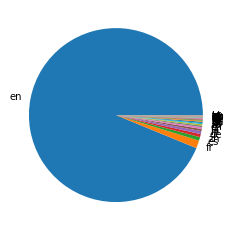

In [71]:
plt.pie(contagem_de_lingua["total"], labels=contagem_de_lingua["original_language"])

In [73]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [74]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

Criando um dataframe

<AxesSubplot:xlabel='lingua', ylabel='total'>

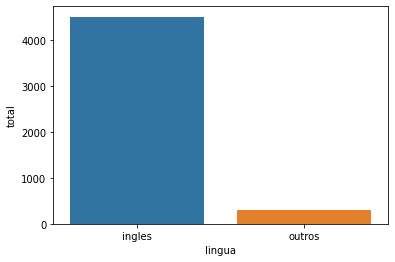

In [79]:
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data=dados)

([<matplotlib.patches.Wedge at 0x21e1e6dde80>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

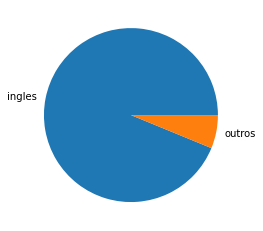

In [81]:
plt.pie(dados["total"], labels=dados["lingua"])

In [84]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

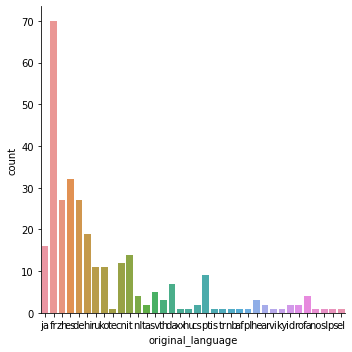

In [86]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language", kind="count", data = filmes_sem_lingua_original_em_ingles)

# Refinando os gráficos

Paleta de cores no seaborn 

<Figure size 360x720 with 0 Axes>

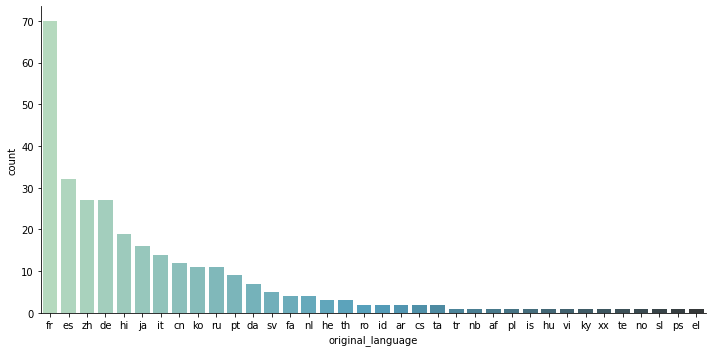

In [96]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
plt.figure(figsize=(5,10)) # gerando uma figura com tamanho 5x10
sns.catplot(x="original_language", kind="count",
            data = filmes_sem_lingua_original_em_ingles,
            aspect = 2,
            palette = "GnBu_d",
            order = total_por_lingua_de_outros_filmes.index)

Gráfico linear 

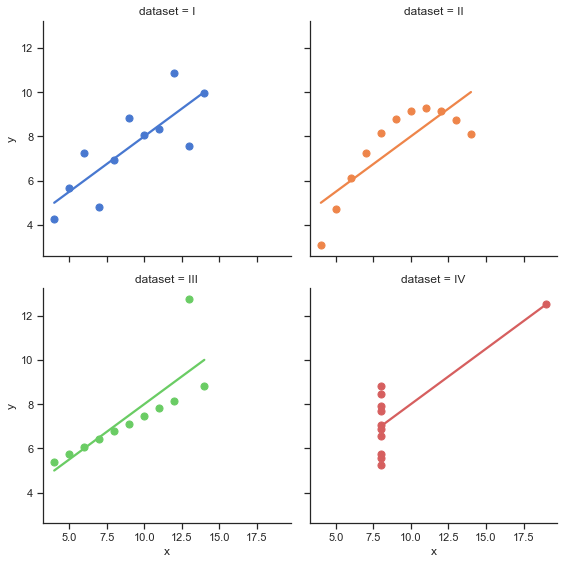

In [99]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y",
           col="dataset",
           hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot, histograma

Olhando os dois primeiros dados da tabela

In [101]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [102]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [107]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


Comparando a média das notas dos filmes Toy Story e Jumanji

In [113]:
print("Nota média do Toy Story: %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji: %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [135]:
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114047 0.8817134921476455


In [114]:
print("Nota mediana do Toy Story: %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji: %.2f" % notas_do_jumanji.nota.median())

Nota média do Toy Story: 4.00
Nota média do Jumanji: 3.50


In [119]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme1
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
filme2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [136]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


D:\projetos\alura\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projetos\alura\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

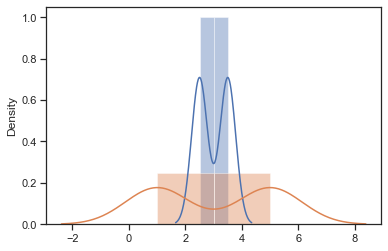

In [124]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

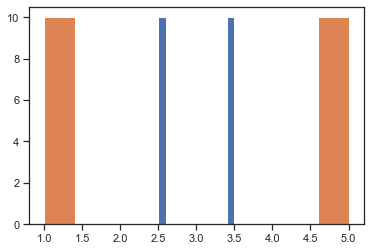

In [125]:
plt.hist(filme1)
plt.hist(filme2)

D:\projetos\alura\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

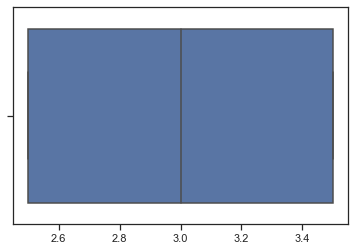

In [126]:
sns.boxplot(filme1)

{'whiskers': [<matplotlib.lines.Line2D at 0x21e23088760>,
 'caps': [<matplotlib.lines.Line2D at 0x21e23088e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e230883d0>,
 'medians': [<matplotlib.lines.Line2D at 0x21e230965e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21e23096970>,
 'means': []}

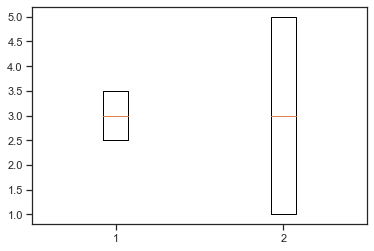

In [127]:
plt.boxplot([filme1, filme2])

D:\projetos\alura\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\projetos\alura\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

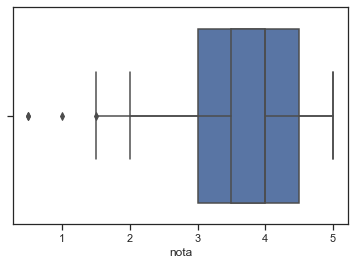

In [129]:
sns.boxplot(notas_do_toy_story.nota)
sns.boxplot(notas_do_jumanji.nota)

{'whiskers': [<matplotlib.lines.Line2D at 0x21e233776a0>,
 'caps': [<matplotlib.lines.Line2D at 0x21e23377dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e23377310>,
 'medians': [<matplotlib.lines.Line2D at 0x21e23381520>,
 'fliers': [<matplotlib.lines.Line2D at 0x21e233818b0>,
 'means': []}

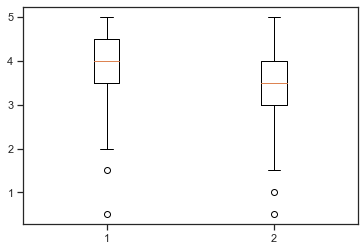

In [131]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

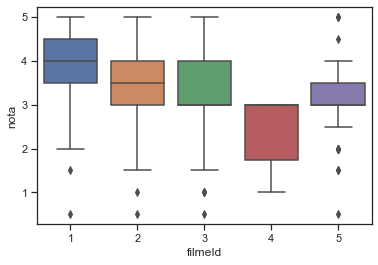

In [134]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))